# Water Quality


Drinking water potability

In [38]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/water-potability/water_potability.csv


## Index
1. Context
2. Column Description
3. Used Python Libraries
4. Know Dataset Nature
5. Exploratory Data Analysis (EDA)
6. Data Preprocessing
7. Data Normalization
8. Feature Engineering
9. Model Buliding
10. Receiver Operating Characteristic Curve (ROC AUC)
11. Conclusion

## Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.
​
Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.
​
1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
​
2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
​
3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
​
4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
​
5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
​
6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
​
7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
​
8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
​
9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
​
10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Column Description
​
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

## Used Python Libraries

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


## Knowing Dataset Nature and Properties

1. head()
2. info()
3. describe()

In [40]:
data = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

In [41]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [43]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Exploratory Data Analysis

1. histogram()
2. heatmap()
3. corr()
4. pivot_table()

In [44]:
data_num = data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

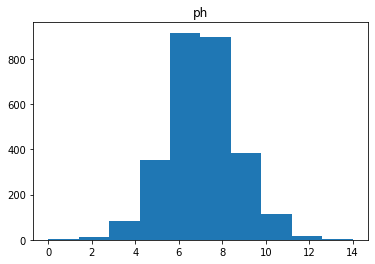

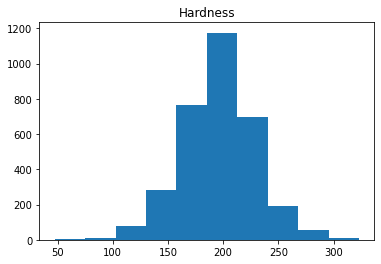

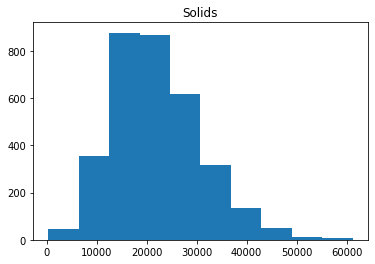

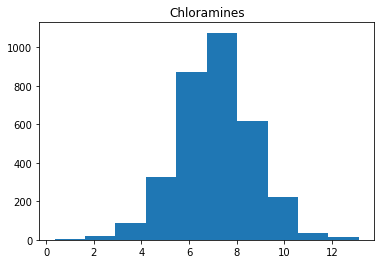

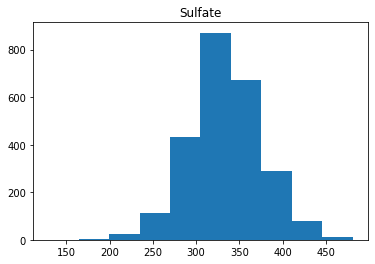

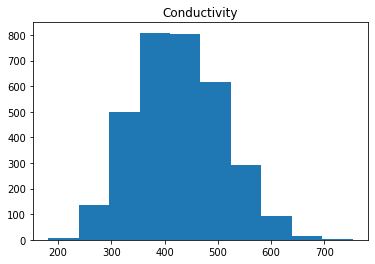

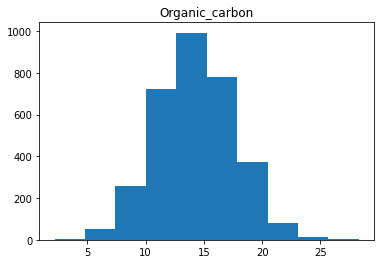

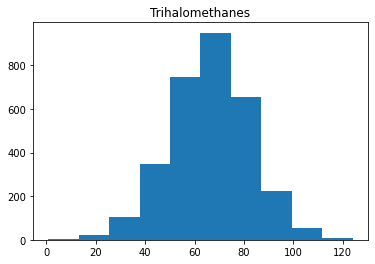

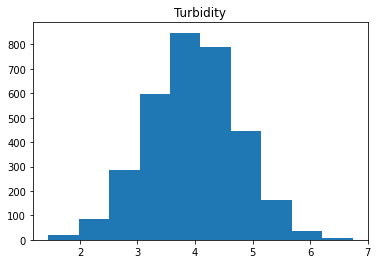

In [45]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.018614        0.043503         0.003354  -0.039057  
Hardness            -0.023915        0.003610        -0.013013  -0.014449  
Solids               0.013831        0.010242      

<AxesSubplot:>

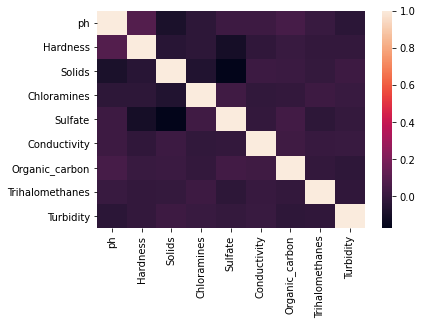

In [46]:
print(data_num.corr())
sns.heatmap(data_num.corr())

In [47]:
pd.pivot_table(data, index='Potability', values=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])

Chloramines  Conductivity    Hardness  Organic_carbon  \
Potability                                                          
0              7.092175    426.730454  196.733292       14.364335   
1              7.169338    425.383800  195.800744       14.160893   

                  Solids    Sulfate  Trihalomethanes  Turbidity        ph  
Potability                                                                 
0           21777.490788  334.56429        66.303555   3.965800  7.085378  
1           22383.991018  332.56699        66.539684   3.968328  7.073783

##  Data Preprocessing
​
1. boxplot()
2. deal with missing value
3. deal with outliers values

In [48]:
for i in data_num.columns:
    if data_num[i].isna().sum() >0 :   
        data[i].fillna(data[i].mean(), inplace=True)             
      

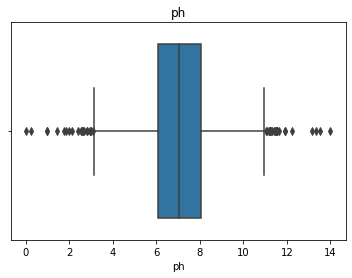

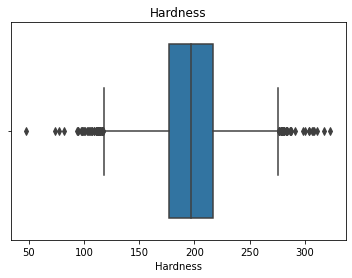

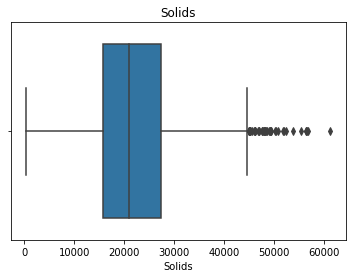

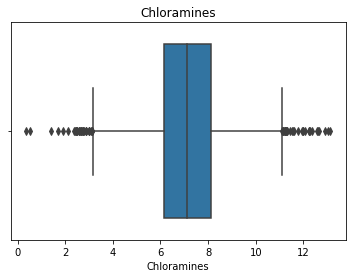

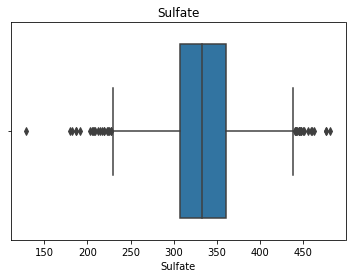

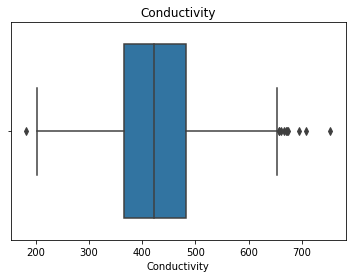

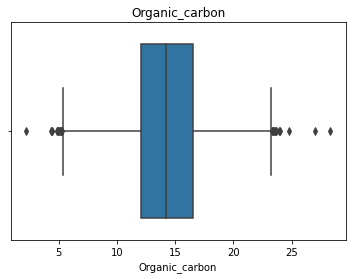

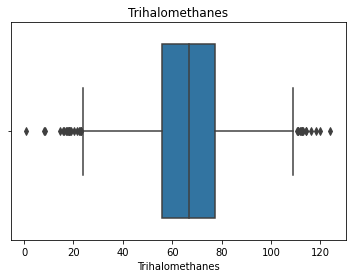

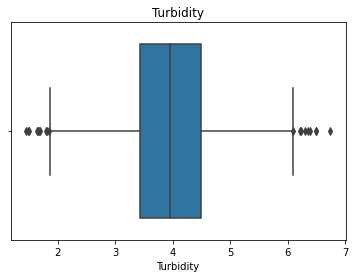

In [49]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

removing outliers from the data

In [50]:
def outlinefree(dataCol):
    # sorting column
    sorted(dataCol)
    
    # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
    
    # getting IQR (interquartile range)
    IQR = Q3-Q1
    
    # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
    
    # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
    
    # return Lower range and upper range.
    return LowerRange,UpperRange

In [51]:
Lowph,Upph = outlinefree(data.ph)
LowHardness,UpHardness = outlinefree(data.Hardness)
LowSolids,UpSolids = outlinefree(data.Solids)
LowChloramines,UpChloramines = outlinefree(data.Chloramines)
LowSulfate,UpSulfate  = outlinefree(data.Sulfate)
LowConductivity ,UpConductivity  = outlinefree(data.Conductivity)
LowOc,UpOc = outlinefree(data.Organic_carbon) 
LowTri ,UpTri = outlinefree(data.Trihalomethanes) 
LowTur,UpTur = outlinefree(data.Turbidity)

In [52]:
data.ph.replace(list(data[(data.ph < Lowph)].ph),Lowph , inplace=True)
data.ph.replace(list(data[(data.ph > Upph)].ph),Upph , inplace=True)

data.Hardness.replace(list(data[(data.Hardness < LowHardness)].Hardness),LowHardness , inplace=True)
data.Hardness.replace(list(data[(data.Hardness > UpHardness)].Hardness),UpHardness , inplace=True)

data.Solids.replace(list(data[(data.Solids < LowSolids)].Solids),LowSolids , inplace=True)
data.Solids.replace(list(data[(data.Solids > UpSolids)].Solids),UpSolids , inplace=True)

data.Chloramines.replace(list(data[(data.Chloramines < LowChloramines)].Chloramines),LowChloramines , inplace=True)
data.Chloramines.replace(list(data[(data.Chloramines > UpChloramines)].Chloramines),UpChloramines , inplace=True)

data.Sulfate.replace(list(data[(data.Sulfate < LowSulfate)].Sulfate),LowSulfate , inplace=True)
data.Sulfate.replace(list(data[(data.Sulfate > UpSulfate)].Sulfate),UpSulfate , inplace=True)

data.Conductivity.replace(list(data[(data.Conductivity < LowConductivity)].Conductivity),LowConductivity , inplace=True)
data.Conductivity.replace(list(data[(data.Conductivity > UpConductivity)].Conductivity),UpConductivity , inplace=True)

data.Organic_carbon.replace(list(data[(data.Organic_carbon < LowOc)].Organic_carbon),LowOc , inplace=True)
data.Organic_carbon.replace(list(data[(data.Organic_carbon > UpOc)].Organic_carbon),UpOc , inplace=True)

data.Trihalomethanes.replace(list(data[(data.Trihalomethanes < LowTri)].Trihalomethanes),LowTri , inplace=True)
data.Trihalomethanes.replace(list(data[(data.Trihalomethanes > UpTri)].Trihalomethanes),UpTri , inplace=True)

data.Turbidity.replace(list(data[(data.Turbidity < LowTur)].Turbidity),LowTur , inplace=True)
data.Turbidity.replace(list(data[(data.Turbidity > UpTur)].Turbidity),UpTur , inplace=True)

## Data Normalization
​
1. boxplot()

In [53]:
data_num = data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

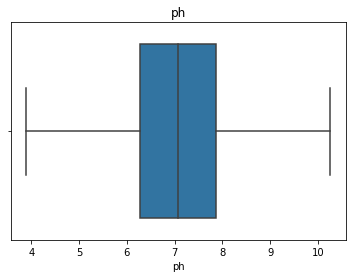

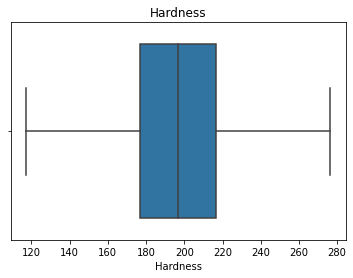

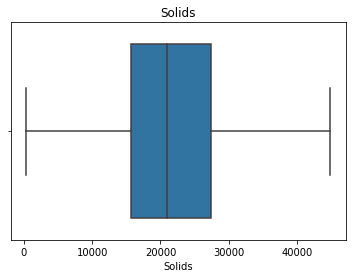

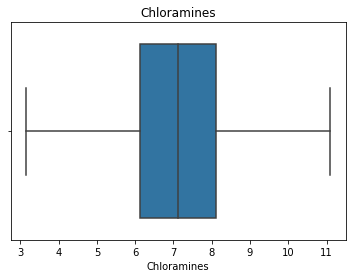

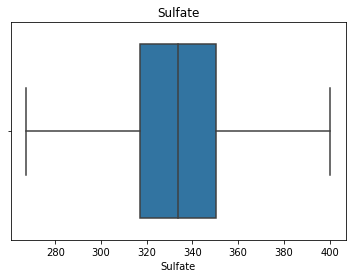

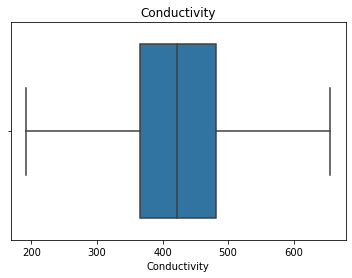

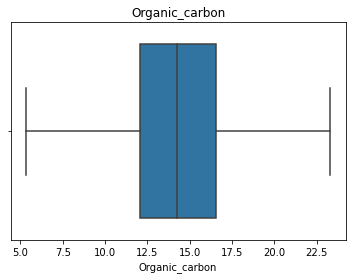

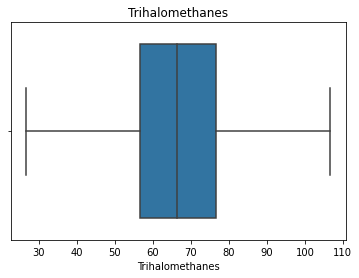

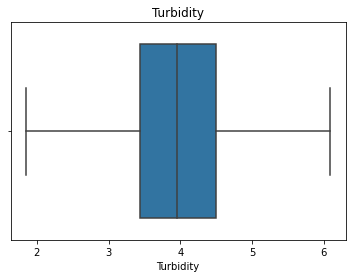

In [54]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

## Feature Engineering

1. pairplot()

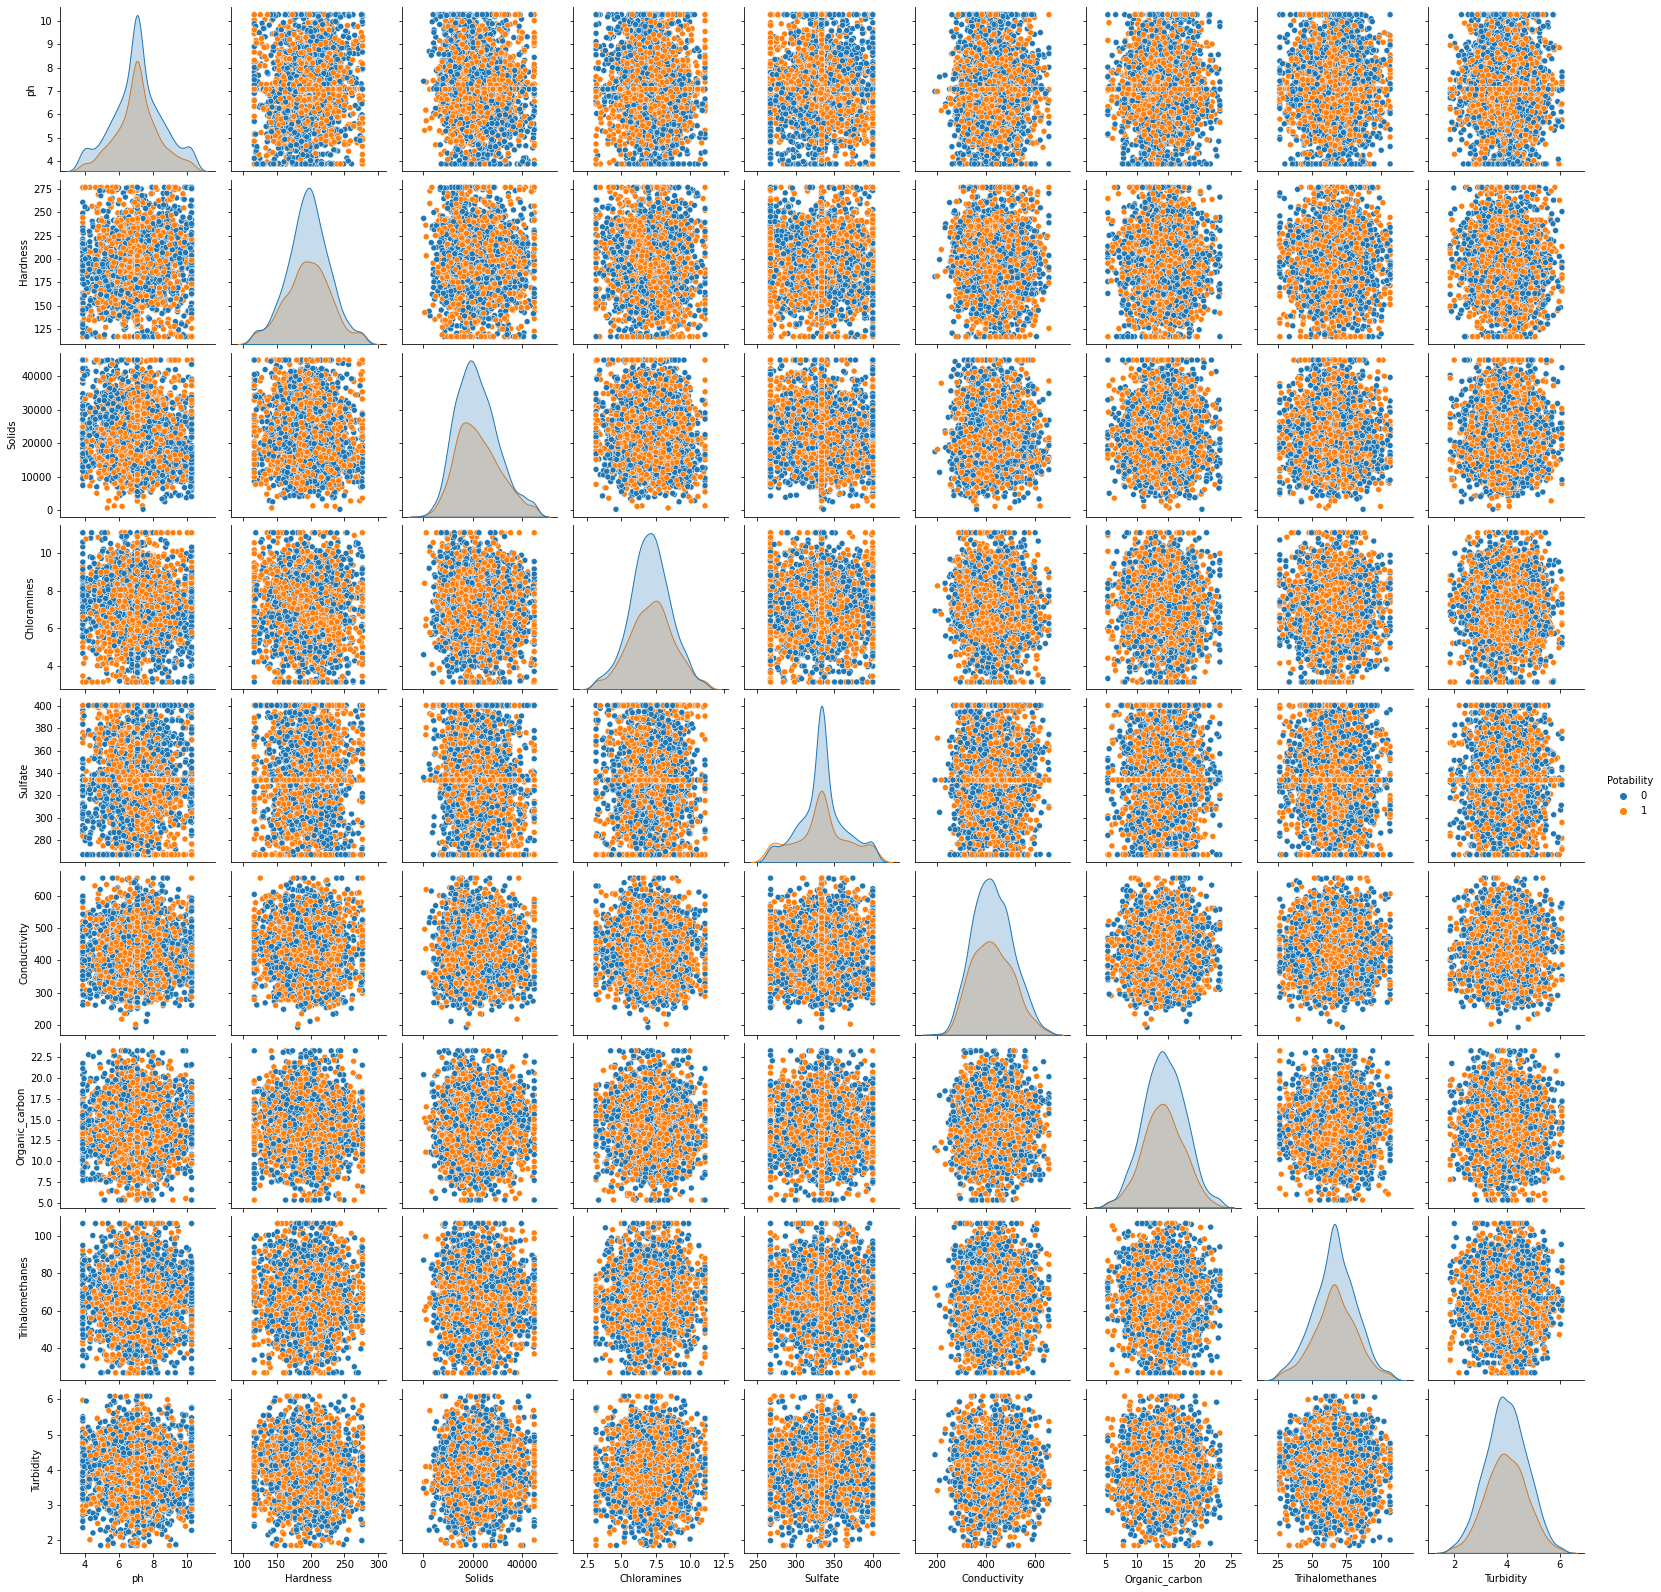

In [55]:
sns.pairplot(data, hue="Potability")

In [56]:
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

## Model Buliding
I  use many algorithms and compare all of them for  f1_score results:

1. Logistic Regression ( f1 score:  0.0)      
2. naive bayes          (  f1_score:  0.3388235294117647) 
3. support vector classification  (  f1_score:  0.0  )
4. **DecisionTreeClassifier ( f1_score:  0.4435797665369649 )** 
5. RandomForestClassifier ( f1_score:  0.1511627906976744 ) 


In [57]:
#------------------------LogisticRegression-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=296)
LRmodel= LogisticRegression()  
LRmodel.fit(X_train, y_train)
trainscore =  LRmodel.score(X_train,y_train)
testscore =  LRmodel.score(X_test,y_test)  
y_pred =  LRmodel.predict(X_test)

In [58]:
print(confusion_matrix(y_test, y_pred))
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

[[512   0]
 [307   0]]
 f1 score:  0.0 

 precision score:  0.0 

 recall score:  0.0 

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       512
           1       0.00      0.00      0.00       307

    accuracy                           0.63       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.63      0.48       819



In [59]:
#------------------------------naive bayes---------------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=179) 

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

y_predNB =  NBmodel.predict(X_test)
print(confusion_matrix(y_test, y_predNB))
print("f1_score: ",f1_score(y_test, y_predNB),'\n')
print("precision_score: ",precision_score(y_test, y_predNB),'\n')
print("recall_score: ",recall_score(y_test, y_predNB),'\n')
print(classification_report(y_test, y_predNB))

[[466  56]
 [225  72]]
f1_score:  0.3388235294117647 

precision_score:  0.5625 

recall_score:  0.24242424242424243 

              precision    recall  f1-score   support

           0       0.67      0.89      0.77       522
           1       0.56      0.24      0.34       297

    accuracy                           0.66       819
   macro avg       0.62      0.57      0.55       819
weighted avg       0.63      0.66      0.61       819



In [60]:
#-------------------------------- support vector classification -------------------------------------  
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=32) 

svcmodel = SVC(probability=True)  
svcmodel.fit(X_train, y_train) 

trainscore =  svcmodel.score(X_train,y_train)
testscore =  svcmodel.score(X_test,y_test)

y_predsvc =  svcmodel.predict(X_test)

print(confusion_matrix(y_test, y_predsvc))
print("f1_score: ",f1_score(y_test, y_predsvc),'\n')
print("precision_score: ",precision_score(y_test, y_predsvc),'\n')
print("recall_score: ",recall_score(y_test, y_predsvc),'\n')
print(classification_report(y_test, y_predsvc),'\n')

[[494   0]
 [325   0]]
f1_score:  0.0 

precision_score:  0.0 

recall_score:  0.0 

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       494
           1       0.00      0.00      0.00       325

    accuracy                           0.60       819
   macro avg       0.30      0.50      0.38       819
weighted avg       0.36      0.60      0.45       819
 



In [61]:
#------------------------------------------ DecisionTree---------------------

X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.25,random_state=298)
    
modelDtree = DecisionTreeClassifier(max_depth=3)
modelDtree.fit(X_train,y_train)
    
training = modelDtree.score(X_train,y_train)
testing = modelDtree.score(X_test,y_test)    
   
y_predtree =  modelDtree.predict(X_test)

print(confusion_matrix(y_test, y_predtree))
print("f1_score: ",f1_score(y_test, y_predtree),'\n')
print("precision_score: ",precision_score(y_test, y_predtree),'\n')
print("recall_score: ",recall_score(y_test, y_predtree),'\n')
print(classification_report(y_test, y_predtree),'\n')

[[419  82]
 [204 114]]
f1_score:  0.4435797665369649 

precision_score:  0.5816326530612245 

recall_score:  0.3584905660377358 

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       501
           1       0.58      0.36      0.44       318

    accuracy                           0.65       819
   macro avg       0.63      0.60      0.59       819
weighted avg       0.64      0.65      0.63       819
 



In [62]:
#------------------------------------------------RandomForest-------------------------------------
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.25,random_state=289)
    
modelRFC = RandomForestClassifier(criterion='entropy',max_depth=3)
modelRFC.fit(X_train,y_train)
    
training = modelRFC.score(X_train,y_train)
testing = modelRFC.score(X_test,y_test)   

y_predRFC =  modelRFC.predict(X_test)

print(confusion_matrix(y_test, y_predRFC))
print("f1_score: ",f1_score(y_test, y_predRFC),'\n')
print("precision_score: ",precision_score(y_test, y_predRFC),'\n')
print("recall_score: ",recall_score(y_test, y_predRFC),'\n')
print(classification_report(y_test, y_predRFC),'\n')

[[502   4]
 [291  22]]
f1_score:  0.12979351032448377 

precision_score:  0.8461538461538461 

recall_score:  0.07028753993610223 

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       506
           1       0.85      0.07      0.13       313

    accuracy                           0.64       819
   macro avg       0.74      0.53      0.45       819
weighted avg       0.71      0.64      0.53       819
 



## Receiver Operating Characteristic Curve (ROC AUC) 

I use many algorithms and compare all of them for auc:

1. Logistic Regression (auc: 0.5225397541516478)
2. naive bayes  (auc: 0.601116374590553)
3. support vector classification (auc: 0.5316263054917202)
4. DecisionTreeClassifier (auc: 0.615752097950846)
5. **RandomForestClassifier (auc: 0.6834702464592918)**

0.5225397541516478


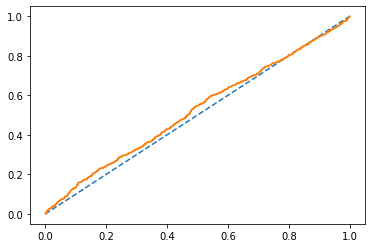

In [63]:
#-------------------------------------- LogisticRegression -------------------------------------
probabilityValues = LRmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.601116374590553


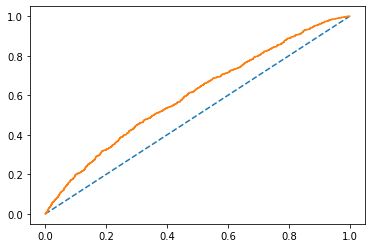

In [64]:
#-------------------------------------- naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.5316263054917202


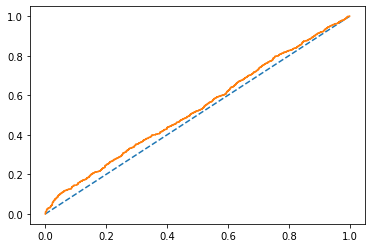

In [65]:
#--------------------------------------  support vector classification -------------------------------------
probabilityValues = svcmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.615752097950846


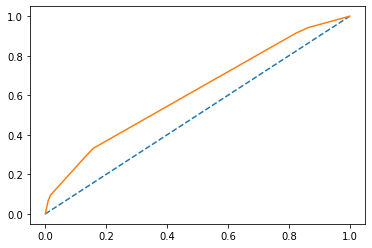

In [66]:
#-------------------------------------- DecisionTree -------------------------------------

probabilityValues = modelDtree.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.6791292466175095


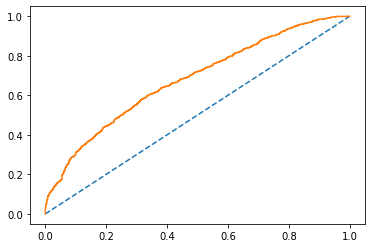

In [67]:
#-------------------------------------- RandomForest -------------------------------------
probabilityValues = modelRFC.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)


## conclusion

I will choose a decision **tree algorithm** for this dataset to predict the safety for human consumption

**DecisionTreeClassifier score**

1. **f1_score: 0.4435797665369649** 
2. **auc: 0.615752097950846**